In [74]:
import pandas as pd
import json 
import urllib
import os
import requests
import matplotlib.pyplot as plt
from PIL import Image

In [75]:
# URL адрес нашего сервера, где.
myurl = "http://localhost:8180/service" 

In [76]:
# Процедура для отправки POST запросов к серверу.

def flask_server_exchenge(body={}, file_name=None):
    req = urllib.request.Request(myurl) 
    req.add_header('Content-Type', 'multipart/form-data; charset=utf-8')
    values = {
             'file':(os.path.basename(file_name), open(file_name,'rb'), 'image/tiff'),
             'json':(None, json.dumps(body), 'application/json')
            }
    print('file_read')

    data = urllib.parse.urlencode(values).encode('utf-8')
    req.add_header('Content-Length', len(data))
    
    response = urllib.request.urlopen(req,data)
    print(response.status)

In [77]:
def draw_result(image, boxes,obj_type):
    fig, ax = plt.subplots(1,1,figsize=(10,7))
    ax.imshow(image)
    for box in boxes:
        rect = plt.Rectangle((box['left'], box['top']), box['width'], box['height'],fill=False, color='red')
        ax.add_patch(rect)
    ax.title.set_text(obj_type)
    plt.show()

In [78]:
def flask_server_exchenge(file_name=None):

    body = {
            'method':"object_localization", 
           }

    values = {
             'file':(os.path.basename(file_name), open(file_name,'rb'), 'image/jpeg'),
             'json':('datas', json.dumps(body), 'application/json')
            }
    r =requests.post(myurl,files=values)
#     print(str(r.content,'utf-8'))
    return json.loads(r.content)

### Получим список изображений из дирректории images.

In [79]:
def filelist(root, file_type):
    """Функция возвращает полностью квалифицированный список файлов в директории"""
    return [os.path.join(directory_path, f) for directory_path, directory_name, 
            files in os.walk(root) for f in files if f.endswith(file_type)]

In [80]:
files = filelist('images/','.tif')
files

['images/bfr18e00-page02_1.tif',
 'images/obh31f00_3.tif',
 'images/rnf51a00.tif',
 'images/aki32e00.tif',
 'images/rqv98d00-page02_1.tif',
 'images/adh36e00_2.tif',
 'images/nuz52d00.tif',
 'images/ciy01a00-page02_1.tif']

### Посмотрим ответ от сервера.

In [81]:
flask_server_exchenge(file_name=files[1])

{'object_localization': [{'position': {'height': 88,
    'left': 197,
    'top': 124,
    'width': 153},
   'source': {'height': 1575, 'width': 1200},
   'type': 'logo'}],
 'success': True}

Отправим поочередно все изображения из директории images на сервер. Полученный bounding box наложим на изображение.

[{'position': {'height': 298, 'left': 1061, 'top': 34, 'width': 368}, 'source': {'height': 3296, 'width': 2560}, 'type': 'logo'}]


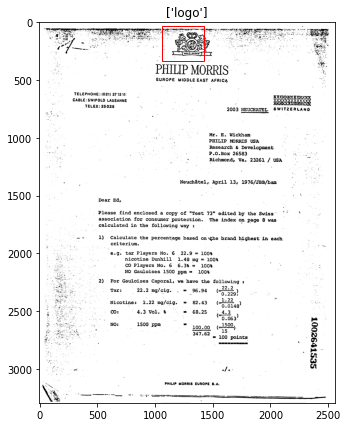

[{'position': {'height': 88, 'left': 197, 'top': 124, 'width': 153}, 'source': {'height': 1575, 'width': 1200}, 'type': 'logo'}]


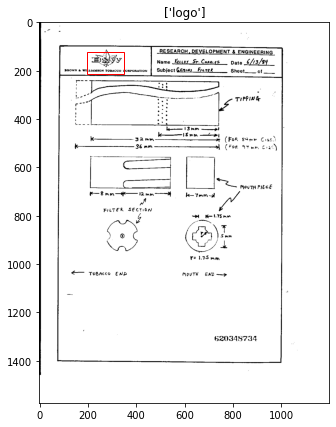

[{'position': {'height': 255, 'left': 1348, 'top': 1985, 'width': 875}, 'source': {'height': 3321, 'width': 2544}, 'type': 'sign'}]


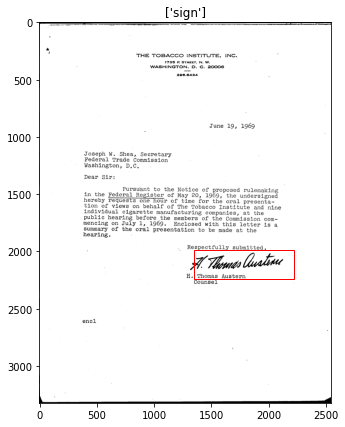

[{'position': {'height': 296, 'left': 1118, 'top': 343, 'width': 424}, 'source': {'height': 3274, 'width': 2560}, 'type': 'logo'}, {'position': {'height': 281, 'left': 1117, 'top': 2122, 'width': 630}, 'source': {'height': 3274, 'width': 2560}, 'type': 'sign'}]


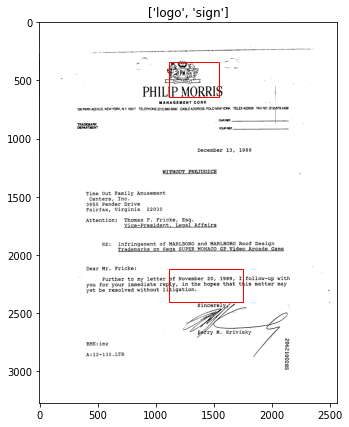

[{'position': {'height': 425, 'left': 1247, 'top': 67, 'width': 295}, 'source': {'height': 2292, 'width': 1728}, 'type': 'logo'}]


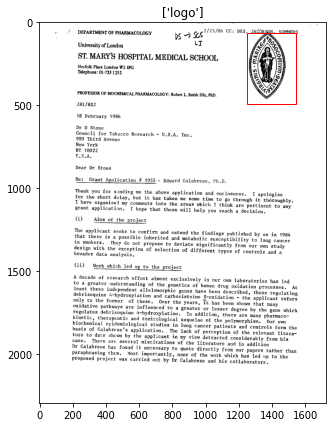

[{'position': {'height': 89, 'left': 1351, 'top': 2355, 'width': 567}, 'source': {'height': 3246, 'width': 2560}, 'type': 'sign'}]


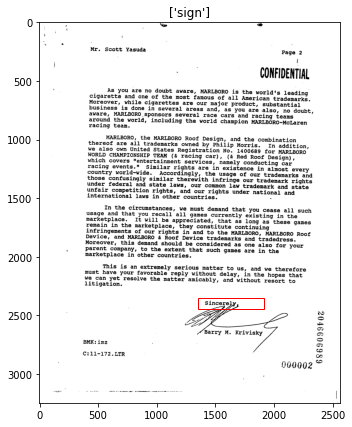

[{'position': {'height': 193, 'left': 53, 'top': 523, 'width': 106}, 'source': {'height': 2292, 'width': 1728}, 'type': 'logo'}, {'position': {'height': 302, 'left': 876, 'top': 1721, 'width': 262}, 'source': {'height': 2292, 'width': 1728}, 'type': 'sign'}]


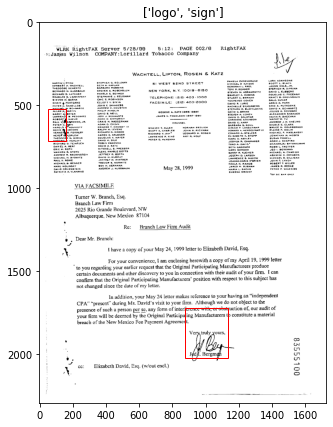

[{'position': {'height': 184, 'left': 47, 'top': -12, 'width': 160}, 'source': {'height': 1575, 'width': 1200}, 'type': 'logo'}]


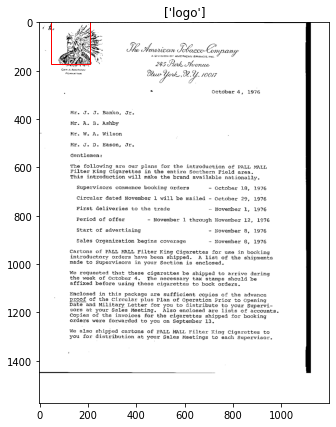

In [82]:
for img_name in files:
    object_info = flask_server_exchenge(file_name=img_name)
    print(object_info['object_localization'])    
    image = Image.open(img_name)

    b_boxes = []
    types = []
    for obj in object_info['object_localization']:
        b_boxes.append(obj['position'])
        types.append(obj['type'])
        
    draw_result(image, b_boxes,types)